In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm

In [9]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/abyssal_nps_outputs/output_23000/hc13_10000_BM_1_13.zarr')
sim = sim.compute()

In [10]:
sim

<xarray.Dataset>
Dimensions:           (trajectory: 8192, obs: 4500)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 4494 4495 4496 4497 4498 4499
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 8187 8188 8189 8190 8191
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 34.75 34.75 34.75 ... nan nan
    bottom            (trajectory, obs) float32 5.5e+03 5.5e+03 ... nan nan
    cons_temperature  (trajectory, obs) float32 0.7446 0.7497 0.7481 ... nan nan
    density           (trajectory, obs) float32 1.028e+03 1.028e+03 ... nan nan
    distance          (trajectory, obs) float32 51.0 51.0 51.0 ... nan nan nan
    floored           (trajectory, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan
    ...                ...
    u                 (trajectory, obs) float32 0.0 2.676e-07 ... nan nan
    v                 (trajectory, obs) float32 0.0 -4.278e-07 ... nan nan
    v_s               (trajectory, obs) float32 2.551e-08 2.551e-08 ... nan nan
    w                 (trajectory, obs) float32 0.0 -0.0001786 ... nan nan
    z                 (trajectory, obs) float64 5e+03 5.012e+03 ... nan nan
    z_kz              (trajectory, obs) float32 0.0 -2.845 -1.222 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.4.2

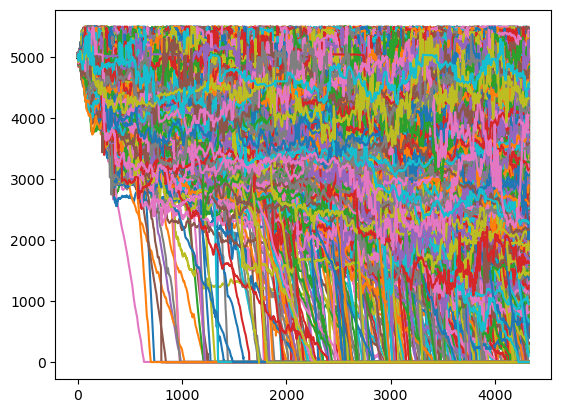

In [11]:
for i in range(8000):
    plt.plot(sim['z'][i,:])

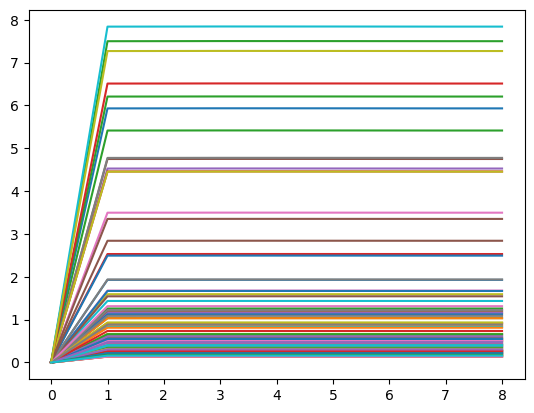

In [104]:
for i in range(100):
    plt.plot(sim['v_s'][i,:])

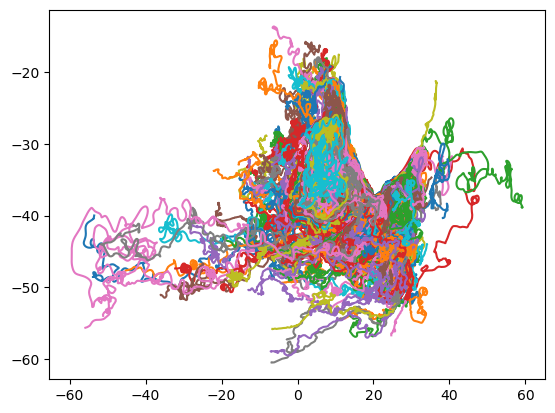

In [6]:
for i in range(1000):
    plt.plot(sim['lon'][i,:], sim['lat'][i,:])
    plt.scatter(sim['lon'][i,0], sim['lat'][i,0])

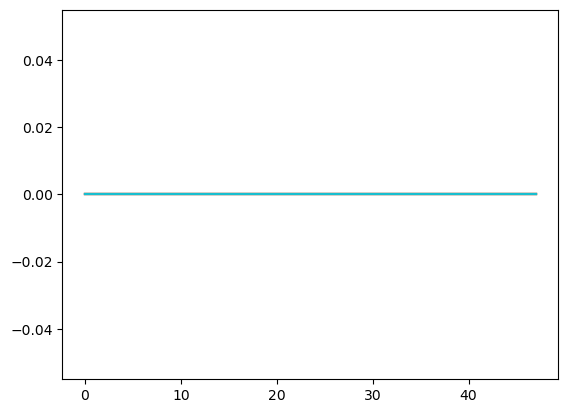

In [135]:
for i in range(10):
    plt.plot(sim['v_s'][i,:])

In [29]:
sim['v_s'].max()

<xarray.DataArray 'v_s' ()>
array(1.19895219e-07)

In [30]:
sim['w_k'].min()

<xarray.DataArray 'w_k' ()>
array(0.)

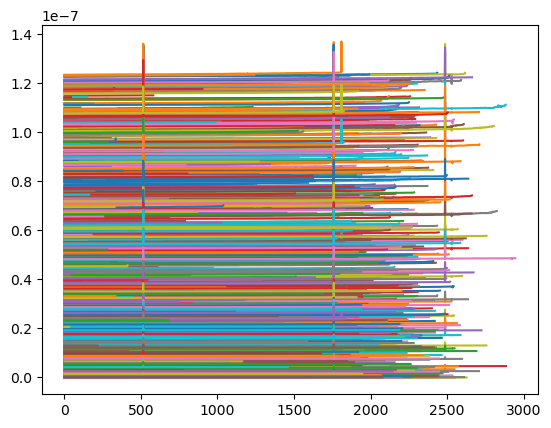

In [79]:
for i in range(1000):
    plt.plot(sim['v_s'][i,:])

In [32]:
for i in range(10):
    plt.plot(sim['diameter'][i,:])

KeyError: 'diameter'

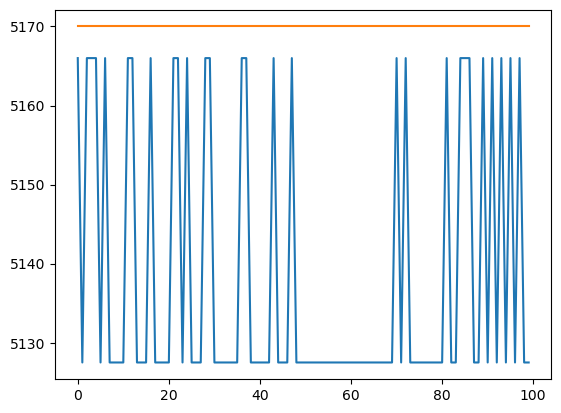

In [33]:
plt.plot(sim['seafloor'][:, 0])
plt.plot(sim['z'][:, 0])

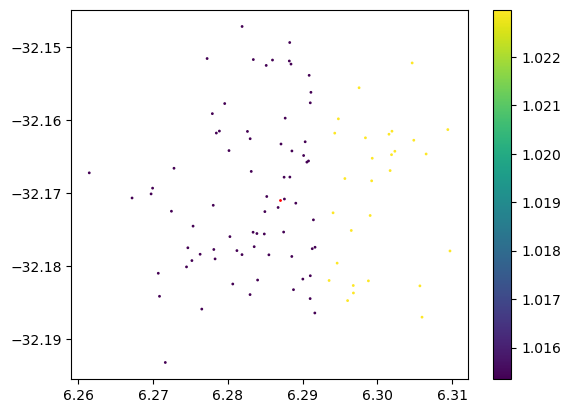

In [34]:
lat_obs = -32.171
lon_obs = 6.287



im= plt.scatter(sim['lon'][:, 0], sim['lat'][:, 0], c=sim['seafloor'][:, 0]/5050, s=1)
plt.scatter(lon_obs, lat_obs, c='r', s=1)
plt.colorbar(im)

In [8]:
test = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5100_test_bottom3.zarr')
test = test.compute()

In [9]:
test

<xarray.Dataset>
Dimensions:           (trajectory: 100, obs: 24)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
  * trajectory        (trajectory) int64 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 34.75 34.75 34.75 ... nan nan
    beta              (trajectory, obs) float32 1.342 1.342 1.342 ... nan nan
    bottom            (trajectory, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan
    cons_temperature  (trajectory, obs) float32 0.7229 0.7176 0.7156 ... nan nan
    density           (trajectory, obs) float32 1.028e+03 1.028e+03 ... nan nan
    distance          (trajectory, obs) float32 51.0 51.0 51.0 ... nan nan nan
    ...                ...
    u                 (trajectory, obs) float32 0.0 2.841e-07 ... nan nan
    v                 (trajectory, obs) float32 0.0 -3.564e-07 ... nan nan
    v_s               (trajectory, obs) float32 1.151e-07 1.151e-07 ... nan nan
    w                 (trajectory, obs) float32 0.0 -0.0001991 ... nan nan
    w_k               (trajectory, obs) float32 0.0 0.0001309 ... nan nan
    z                 (trajectory, obs) float64 5.099e+03 5.092e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.1-46-g28f231fa

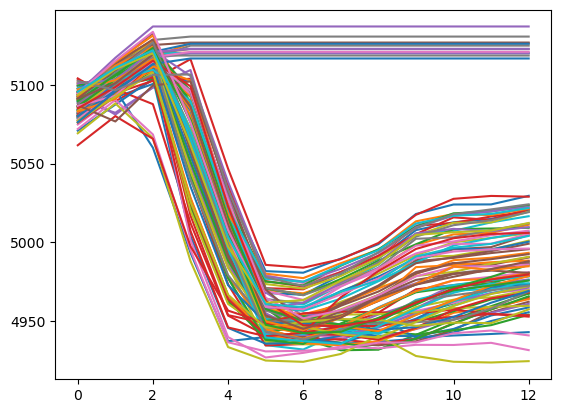

In [10]:
for i in range(100):
    plt.plot(test['z'][i,:])

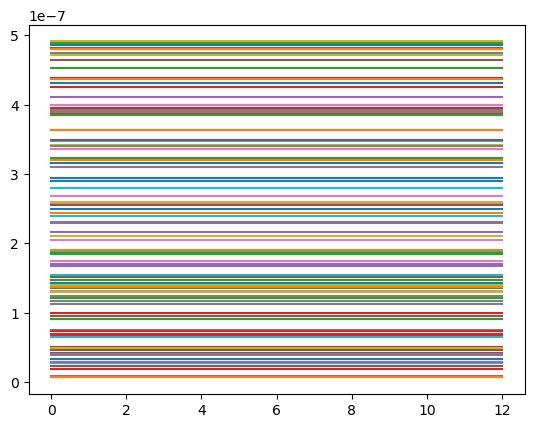

In [11]:
for i in range(100):
    plt.plot(test['radius'][i,:])

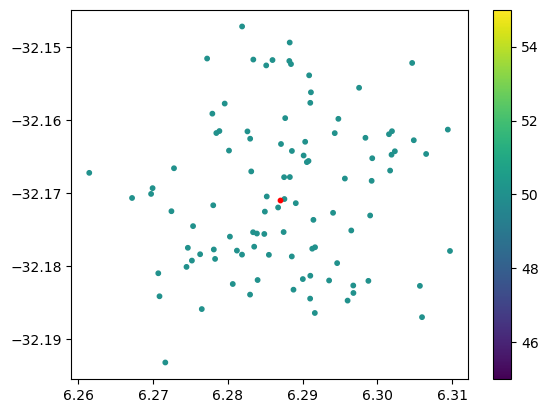

In [12]:
lat_obs = -32.171
lon_obs = 6.287



im= plt.scatter(test['lon'][:, 0], test['lat'][:, 0], c=test['seafloor'][:, 0]-test['z'][:,0], s=10)
plt.scatter(lon_obs, lat_obs, c='r', s=10)
plt.colorbar(im)

In [21]:
-test['w_k'].min()

<xarray.DataArray 'w_k' ()>
array(0.00017296)

In [15]:
test['v_s'].max()

<xarray.DataArray 'v_s' ()>
array(1.19862349e-07)

In [33]:
test = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5100_test_frag3.zarr')
text = test.compute()

In [65]:
A = test['bottom'][:, 10].values

100 - np.isnan(A).sum()

82

In [48]:
for i in range(10, 80, 10):
    
    test = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5100_{i}.zarr')
a    is_bottom = test['bottom'].values
    depth = test['z'].values
    
    print(i, is_bottom[:, 0].sum(), is_bottom[:, 1].sum(), is_bottom[:, 4].sum())


10 0.0 85.0 nan
20 0.0 51.0 nan
30 0.0 1.0 nan
40 0.0 0.0 nan
50 0.0 0.0 nan
60 0.0 0.0 nan
70 0.0 0.0 0.0


In [40]:
test['bottom'].values

array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]], dtype=float32)

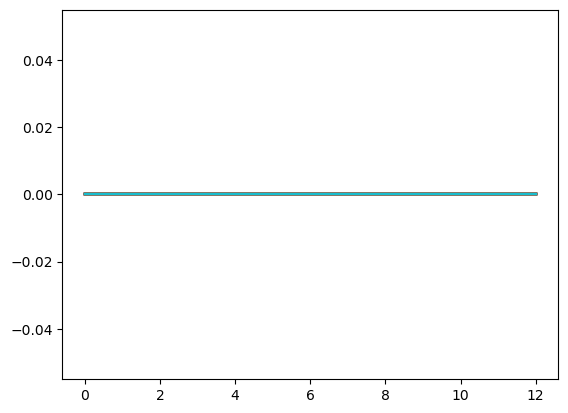

In [86]:
for i in range(100):
    plt.plot(test['surface'][i,:])

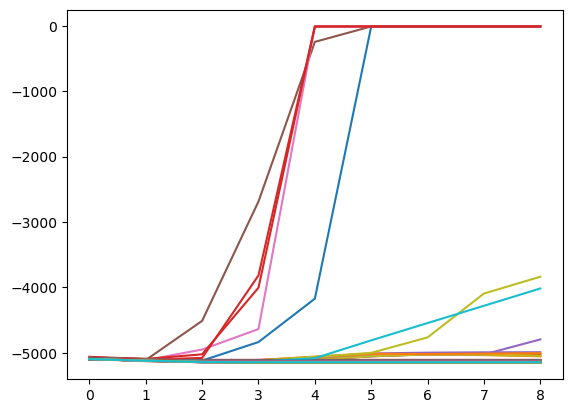

In [23]:
for i in range(100):
    plt.plot(-test['z'][i,:])

In [39]:
test['w_k'][:,:8].values.min()

-2.997433

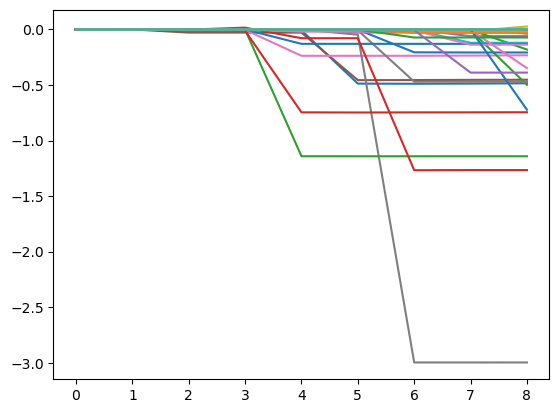

In [30]:
for i in range(100):
    plt.plot(test['w_k'][i,:])
    

IndexError: Index is not smaller than dimension 100 >= 100

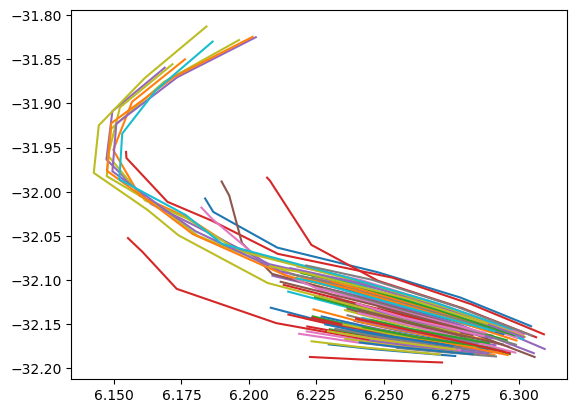

In [25]:
for i in range(1000):
    plt.plot(test['lon'][i,:], test['lat'][i,:])

# Isochrones
An isochrone map in geography and urban planning is a map that depicts the area accessible from a point within a certain time threshold.[1] An isochrone (iso = equal, chrone = time).

In [2]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/set_19/set19_100.zarr/')
sim = sim.compute()

In [3]:
time = sim['time'][0,:4856]#np.linspace(0, 4855, 4856)

In [4]:
time

<xarray.DataArray 'time' (obs: 4856)>
array(['2020-01-30T12:00:00.000000000', '2020-01-29T12:00:00.000000000',
       '2020-01-28T12:00:00.000000000', ...,
                                 'NaT',                           'NaT',
                                 'NaT'], dtype='datetime64[ns]')
Dimensions without coordinates: obs
Attributes:
    axis:           T
    long_name:      
    standard_name:  time

In [5]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Distancedisplacement.svg/2560px-Distancedisplacement.svg.png" alt="drawing" width="400"/>


## Displacement $s(t)$

$$s(t) = |\vec{x}(t) - \vec{x}_0|$$


## Distance $d(t)$

$$d(t; \vec{x_0})$$


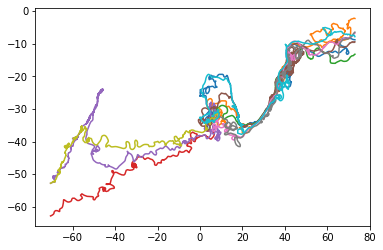

In [6]:
for i in range(10):
    plt.plot(sim['lon'][i,:], sim['lat'][i,:])

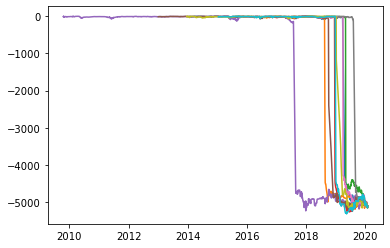

In [7]:
for i in range(10):
    plt.plot(sim['time'][i,:], -sim['z'][i,:])

In [8]:
def haversine(coord1: object, coord2: object):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)** 2 + np.cos(phi_1)*np.cos(phi_2)*np.sin(delta_lambda/2.0)**2
    
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R*c  # output distance in meters
    
    return meters

In [9]:
position = (sim['lon'][:,:].values, sim['lat'][:,:].values)
origin = (sim['lon'][0,:].values, sim['lat'][0,:].values)

s = haversine(origin, position) 

In [10]:
sim['lon'][:,1:].values.shape

(10000, 4859)

In [11]:
x = (sim['lon'][:,:-1].values, sim['lat'][:,:-1].values)
x_shift = (sim['lon'][:,1:].values, sim['lat'][:,1:].values)

dx = haversine(x, x_shift)
distance = np.cumsum(dx, axis=1)

In [12]:
dx[:,0]

array([5236.14138489, 4108.50450707, 6347.04669021, ..., 4477.61699725,
       4063.49813574, 4884.29806855])

Text(0.5, 0, 'Kilometers')

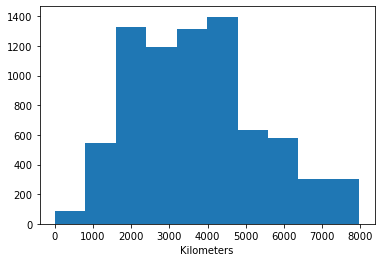

In [13]:
plt.hist(s[:, 1000]/1e3, label='Displacement')
plt.xlabel('Kilometers')

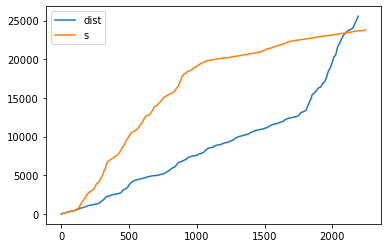

In [14]:
plt.plot(distance[0, :]/1e3, label='dist')
plt.plot(distance[1000, :]/1e3, label='s')
plt.legend()

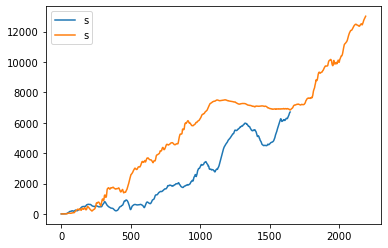

In [15]:
plt.plot(s[1, :]/1e3, label='s')
plt.plot(s[1000, :]/1e3, label='s')
plt.legend()

In [16]:
def filter_trajectories(data, condition):
    k, _ = np.where(condition)
    index = np.unique(k)
    
    data_relevant = data.where(data['trajectory'].isin(index), drop=True)

    return data_relevant

In [19]:
nano = sim.where(sim.diameter < 1e-6, drop=True)

In [20]:
nano

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 1420)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

In [21]:
nano_zfilter = nano.where(nano.z>100)

In [22]:
w = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2021-11-27.nc')

In [23]:
vertical_bins = -w['depthw'].values[::-1]

In [ ]:
time_scales = [10] + [i for i in range(100, 600, 100)] + [1000, 10000]

In [24]:
vertical_bins

array([-5.50000146e+03, -5.05247412e+03, -4.61746240e+03, -4.19681592e+03,
       -3.79247363e+03, -3.40640186e+03, -3.04051538e+03, -2.69658252e+03,
       -2.37612305e+03, -2.08030859e+03, -1.80988000e+03, -1.56509058e+03,
       -1.34568701e+03, -1.15092847e+03, -9.79643372e+02, -8.30311890e+02,
       -7.01165771e+02, -5.90290100e+02, -4.95718384e+02, -4.15511902e+02,
       -3.47821594e+02, -2.90930267e+02, -2.43278076e+02, -2.03473526e+02,
       -1.70293854e+02, -1.42677887e+02, -1.19714096e+02, -1.00626091e+02,
       -8.47572784e+01, -7.15555344e+01, -6.05588074e+01, -5.13819351e+01,
       -4.37048988e+01, -3.72624855e+01, -3.18353996e+01, -2.72426338e+01,
       -2.33349934e+01, -1.99896641e+01, -1.71056423e+01, -1.45999317e+01,
       -1.24043722e+01, -1.04630241e+01, -8.72999573e+00, -7.16765165e+00,
       -5.74513674e+00, -4.43716145e+00, -3.22300124e+00, -2.08567595e+00,
       -1.01127517e+00, -0.00000000e+00])

In [25]:
time = sim['time'][0,:4856]#np.linspace(0, 4855, 4856)

In [26]:
len(time)

4856

In [39]:
nano.dims['obs']

1420

In [42]:
statz = {}
counts = {}
dist = {}
time_dim = len(time)
vertical_bins = -w['depthw'].values[::-1]
N_bins = len(vertical_bins)-1



for ft in tqdm([100,1000, 10000]):
    print(ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_19/set19_{ft}.zarr')
    sim = sim.compute()
    nano = sim.where(sim.diameter < 1e-6, drop=True)
    
    
    time_dim = nano.dims['obs']
    hist_counts = np.zeros((N_bins, time_dim))
    for i, fr in enumerate(range(0, time_dim)):

        x = plt.hist(-nano['z'][:,fr].dropna('traj'), bins=vertical_bins, label = fr, density=False)
        hist_counts[:, i] = x[0]
        plt.close()
        

    total_particles = np.sum(hist_counts, axis=0)
    statz[ft] = hist_counts
    counts[ft] = total_particles


  0%|                                                                                | 0/3 [00:00<?, ?it/s]

100


 33%|████████████████████████                                                | 1/3 [01:24<02:48, 84.50s/it]

1000


 67%|███████████████████████████████████████████████▎                       | 2/3 [05:26<02:57, 177.05s/it]

10000


100%|███████████████████████████████████████████████████████████████████████| 3/3 [09:28<00:00, 189.42s/it]


In [45]:
statz[10000].shape

(49, 4856)

In [47]:
y.shape

(49, 4856)

In [52]:
statz[1000].shape

(49, 4)

In [48]:
x.shape

(49, 4856)

In [50]:
plt.imshow

masked_array(
  data=[[10000.0, 10000.0, 10000.0, ..., 45.0, 44.0, 45.0],
        [--, --, --, ..., 130.0, 131.0, 130.0],
        [--, --, --, ..., 124.0, 122.0, 121.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0)

0


ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

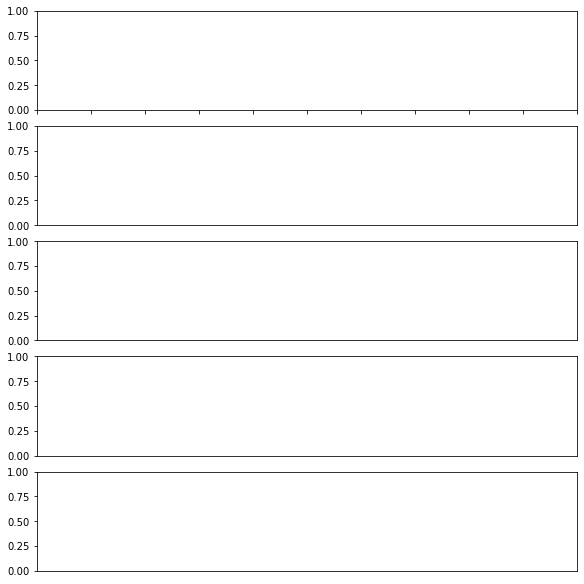

In [49]:
x, y = np.meshgrid(time, vertical_bins[0:-1])

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(8, 8),
                       sharex=True, constrained_layout=True)

# for ft in [10, 100, 1000]:
#     ax[0].plot(time, counts[ft],label=f'$\lambda_f$ = {ft} days')
# ax[0].legend(ncol=2, loc='center left')
    
# ax[0].set_ylabel('Number of particles')
# # ax[1].set_ylabel('Number of particles')  
# ax[2].set_ylabel('Depth (m)')  
# ax[4].set_xlabel('Year') 
# ax[0].grid()

color_map = 'magma'

for i, sc in enumerate([1000, 10000]):
    print(i)
    x, y = np.meshgrid(time, vertical_bins[0:-1])
    a = np.ma.masked_equal(statz[sc], 0)
    im1 = ax[i].pcolormesh(x, y, a/counts[sc], cmap=color_map, vmin = 0, vmax=0.5)
    ax[i].text(17300, -1000, f'$\lambda_f$ = {sc} days')

# a = np.ma.masked_equal(statz[500], 0)
# im1 = ax[2].pcolormesh(x, y, a/counts[500], cmap=color_map, vmin = 0, vmax=0.5)
# ax[2].text(17300, -1000, '$\lambda_f$ = 500 days')

# # b = np.ma.masked_equal(statz[2500], 0)
# # im2= ax[2].pcolormesh(x, y, b/counts[2500], cmap=color_map, vmin = 0, vmax=0.2)
# # ax[2].text(17300, -1000, '$\lambda_f$ = 2500 days')


# c = np.ma.masked_equal(statz[5000], 0)
# im3 = ax[3].pcolormesh(x, y, c/counts[5000], cmap=color_map, vmin = 0, vmax=0.5)
# ax[3].text(17300, -1000, '$\lambda_f$ = 5000 days')

# d = np.ma.masked_equal(statz[50000], 0)
# im4 = ax[4].pcolormesh(x, y, d/counts[50000], cmap=color_map, vmin = 0, vmax=0.5)
# ax[4].text(17300, -1000, '$\lambda_f$ = 50000 days')
# ax[4].text(17300, -1500, 'No fragmentation')

# bar_ax = fig.add_axes([0.3, -0.05, 0.5, 0.02])
# # ax[5].axis('off')
# cbar = fig.colorbar(im3, cax=bar_ax, orientation='horizontal',extend='max', label='Density of particles per timestep')
# # ax[0].pcolormesh(x, y, -hist_counts, cmap='viridis')
# ax[0].set_title('Nanoparticles (50-1000 $nm$) in the water column')
# # plt.savefig('../figs/frag_t_Vdist_nano.png', dpi=300)

In [ ]:
domain_limits = [[-73, 25], [-80, 0]]
number_bins = (98, 80)

In [108]:
bins

NameError: name 'bins' is not defined

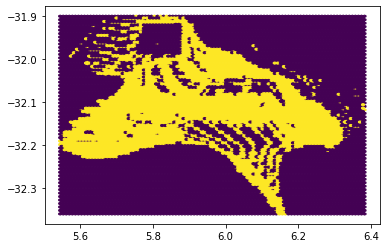

In [107]:
age = 30
particulas = 10000
x = sim['lon'][:,:age].values
y = sim['lat'][:,:age].values
plt.hexbin(x, y, bins=2)

In [88]:
sim[]

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float64 1.0 1.0 1.0 ... -2.147e+09 -2.147e+09
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

/tmp/ipykernel_305148/764854673.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, b, cmap=color_map)


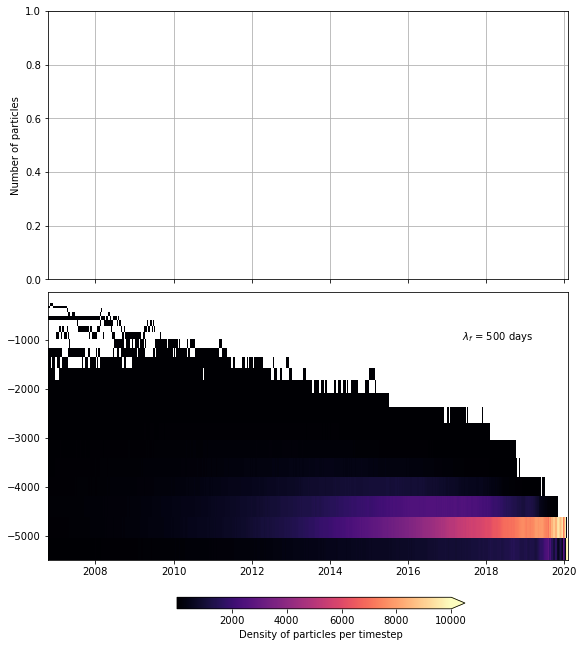

In [80]:
x, y = np.meshgrid(time, vertical_bins[0:-1])

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8, 8),
                       sharex=True, constrained_layout=True)

# for ft in [50, 500, 5000, 50000]:
#     ax[0].plot(time, counts[ft],label=f'$\lambda_f$ = {ft} days')
# ax[0].legend(ncol=2, loc='center left')
    
ax[0].set_ylabel('Number of particles')
# ax[1].set_ylabel('Number of particles')  
ax[0].grid()

color_map = 'magma'

b = np.ma.masked_equal(statz[500], 0)
im1 = ax[1].pcolormesh(x, y, b, cmap=color_map)
ax[1].text(17300, -1000, '$\lambda_f$ = 500 days')

bar_ax = fig.add_axes([0.3, -0.05, 0.5, 0.02])
# ax[5].axis('off')
cbar = fig.colorbar(im1, cax=bar_ax, orientation='horizontal',extend='max', label='Density of particles per timestep')

In [83]:
vertical_bins[0:-2].shape

(48,)

In [ ]:
np.histogram2d()